# Part C - Which Club has the Best Staff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os
import warnings

In [2]:
path = os.getcwd()
path

'/Users/vishalbalaji/GitHub-repos/AI---1/Project'

**We load all the data we need here**

In [3]:
df_15 = pd.read_csv(path + '/fifadataset/players_15.csv')
df_16 = pd.read_csv(path + '/fifadataset/players_16.csv')
df_17 = pd.read_csv(path + '/fifadataset/players_17.csv')
df_18 = pd.read_csv(path + '/fifadataset/players_18.csv')
df_19 = pd.read_csv(path + '/fifadataset/players_19.csv')
df_20 = pd.read_csv(path + '/fifadataset/players_20.csv')
teams_df = pd.read_csv(path + '/fifadataset/fifa_teams.csv')

**Splitting into DataFrames of only Goal Keepers and Others**

Goal Keepers and Other players have mutually exclusive attributes in most cases, and it is hence a good idea to separate them

In [4]:
gk_15 = df_15[df_15['player_positions'] == 'GK']
gk_16 = df_16[df_16['player_positions'] == 'GK']
gk_17 = df_17[df_17['player_positions'] == 'GK']
gk_18 = df_18[df_18['player_positions'] == 'GK']
gk_19 = df_19[df_19['player_positions'] == 'GK']
gk_20 = df_20[df_20['player_positions'] == 'GK']

not_gk_15 = df_15[df_15['player_positions'] != 'GK']
not_gk_16 = df_16[df_16['player_positions'] != 'GK']
not_gk_17 = df_17[df_17['player_positions'] != 'GK']
not_gk_18 = df_18[df_18['player_positions'] != 'GK']
not_gk_19 = df_19[df_19['player_positions'] != 'GK']
not_gk_20 = df_20[df_20['player_positions'] != 'GK']

In [5]:
def add_subtract(x):
    if '-' in str(x):
        return(int(x.split('-')[0]) - int(x.split('-')[1]))
    if '+' in str(x):
        return(int(x.split('+')[0]) + int(x.split('+')[1]))
    else:
        return(int(x))

**Separating out desirable features and teams for GK**

Here we separate out all the attributes we need for Goal Keepers.
All the necessary variables we us for each position henceforth have been determined by us

In [6]:
columns_1 = ['sofifa_id','club','overall','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']
teams = teams_df['team']
gk_cols = ['overall','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']

gk_staff_15 = gk_15[gk_15['club'].isin(teams)][columns_1]
gk_staff_16 = gk_16[gk_16['club'].isin(teams)][columns_1]
gk_staff_17 = gk_17[gk_17['club'].isin(teams)][columns_1]
gk_staff_18 = gk_18[gk_18['club'].isin(teams)][columns_1]
gk_staff_19 = gk_19[gk_19['club'].isin(teams)][columns_1]
gk_staff_19 = gk_19[gk_19['club'].isin(teams)][columns_1]
gk_staff_20 = gk_20[gk_20['club'].isin(teams)][columns_1]


for i in gk_cols:

    gk_staff_15[i] = gk_staff_15[i].fillna('0').apply(lambda x: add_subtract(x))
    gk_staff_16[i] = gk_staff_16[i].fillna('0').apply(lambda x: add_subtract(x))
    gk_staff_17[i] = gk_staff_17[i].fillna('0').apply(lambda x: add_subtract(x))
    gk_staff_18[i] = gk_staff_18[i].fillna('0').apply(lambda x: add_subtract(x))
    gk_staff_19[i] = gk_staff_19[i].fillna('0').apply(lambda x: add_subtract(x))
    gk_staff_20[i] = gk_staff_20[i].fillna('0').apply(lambda x: add_subtract(x))

**Here we combine all the columns from 2015 to 2020 side by side with all the necessary columns**

In [7]:
# staff_15.join(staff_16,on='sofifa_id',rsuffix='_16')
combined_df = pd.merge(gk_staff_15,gk_staff_16,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('_15','_16'))
combined_df = pd.merge(combined_df,gk_staff_17,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_abc'))
combined_df = pd.merge(combined_df,gk_staff_18,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_18'))
combined_df = pd.merge(combined_df,gk_staff_19,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_19'))
combined_df = pd.merge(combined_df,gk_staff_20,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_20'))
# combined_df.rename(columns={'club': 'club_17', 'overall': 'overall_17','gk_diving': 'gk_diving_17', 'gk_positioning': 'gk_positioning_17','gk_reflexes': 'gk_reflexes_17','gk_handling': 'gk_handling_17','gk_kicking': 'gk_kicking_17'}, inplace=True)
gk_combined_df = combined_df.copy()
gk_combined_df = gk_combined_df.fillna(0)
gk_combined_df.head()

,sofifa_id,club_15,overall_15,gk_diving_15,gk_handling_15,gk_kicking_15,gk_reflexes_15,gk_speed_15,gk_positioning_15,goalkeeping_diving_15,...,gk_handling_20,gk_kicking_20,gk_reflexes_20,gk_speed_20,gk_positioning_20,goalkeeping_diving_20,goalkeeping_handling_20,goalkeeping_kicking_20,goalkeeping_positioning_20,goalkeeping_reflexes_20
0,167495,FC Bayern München,90.0,87.0,85.0,92.0,86.0,60.0,90.0,87.0,...,87.0,91.0,87.0,57.0,85.0,87.0,87.0,91.0,85.0,87.0
1,192119,Chelsea,86.0,84.0,87.0,69.0,88.0,49.0,86.0,86.0,...,89.0,72.0,87.0,49.0,85.0,85.0,89.0,72.0,85.0,87.0
2,167948,Tottenham Hotspur,85.0,86.0,81.0,71.0,88.0,64.0,81.0,86.0,...,82.0,68.0,91.0,63.0,84.0,89.0,82.0,68.0,84.0,91.0
3,48940,Chelsea,85.0,83.0,84.0,73.0,84.0,49.0,83.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,168435,Paris Saint-Germain,84.0,85.0,79.0,73.0,87.0,51.0,84.0,84.0,...,80.0,76.0,82.0,51.0,84.0,84.0,80.0,76.0,84.0,82.0


**We initialize 2 dictionaries with all the teams we have here**

1 dictionary to keep track of the scores and the other to keep track of the counts. Scores and counts will be descibed below

In [8]:
gk_scores = dict(zip(teams,np.zeros(len(teams))))
gk_counter = dict(zip(teams,np.zeros(len(teams))))

**Steps for calculating scores and counts**

Here we have taken a granular approach to scoring. We tried modelling scores as average change of stats of players across the years, but we felt that it did not capture the granularity of the data. So we define the formula for calculating scores as follows:

    1. We take the necessary variables for each position (As informed above, we have decided what these variables will be for each position. We have definied 4 positions; Goal Keeping, Defence, Midfield and Offence
    2. We calculate the impact that a team had on each player in the team in a given year. This impact is calculated as follows
    
$$Impact_{year} =\ 2\cdot\left(Overall_{16}-Overall_{15}\right)\ +\ \sum_{i\ =\ 1}^n(Attribute_{16_i}\ -Attribute_{15_i})$$
    
    We are putting a higher penalty on Overall because we want to praise or punish an increase or decrease in Overall more than the others. The "Attribute" refers to all the other things we take for calculation other than "Overall"
    3. This Impact is calculated for each player for each year that they have played. So there are totally "player years" number of samples.
    4. A team's score is Sum of all the Impact they have had summed over "player years" played in their team.
    5. We calculate this Impact for each position mentioned above.
    6. A weighted average over the 4 positions is calculated for each team.
    7. These numbers are normalized so all values lie between 0 and 1.
    
Some other pointers:

    1. Player Impact is calculated for previous year considering team played there. For example, if player plays 2015 season in Team A and 2016 season in Team B, the Impact is calculated as difference between 16 and 15, but is credited to the team he was in 15, which is Team A in this case.
    2. This means players who played only in 2015 or only in 2020 will be left out of our final calculation. The "counter" variable is coded to consider this, and only players with > 1 season of play are considered.
    
**Let us now see all these steps in detail**

    

**Here we calculate Impact on Goalkeepers for all teams across time periods**

In [9]:
for k in range(len(gk_combined_df)):
    temp = gk_combined_df.iloc[k]
    list_15 = [i + '_15' for i in gk_cols]
    list_16 = [i + '_16' for i in gk_cols]
    list_17 = [i + '' for i in gk_cols]
    list_18 = [i + '_18' for i in gk_cols]
    list_19 = [i + '_19' for i in gk_cols]
    list_20 = [i + '_20' for i in gk_cols]

    if temp['club_15'] != 0 and temp['club_16'] != 0: #Calculating impact for player for 15 --> 16
        year_1 = temp[list_16].values - temp[list_15].values #Subtracting Attributes_16 and Attributes_15
        year_1[0] *= 2 #Adding a penalty on "Overall"
        gk_counter[temp['club_15']] += 1 #For each value calculated, we update the counter for the team as count of a player year
        gk_scores[temp['club_15']] += sum(year_1) #Scores are updated for the team
    
    if temp['club_16'] != 0 and temp['club'] != 0:
        year_2 = temp[list_17].values - temp[list_16].values
        year_2[0] *= 2
        gk_counter[temp['club_16']] += 1
        gk_scores[temp['club_16']] += sum(year_2)
    
    if temp['club'] != 0 and temp['club_18'] != 0:
        year_3 = temp[list_18].values - temp[list_17].values
        year_3[0] *= 2
        gk_counter[temp['club']] += 1
        gk_scores[temp['club']] += sum(year_3)
        
    if temp['club_18'] != 0 and temp['club_19'] != 0:
        year_4 = temp[list_19].values - temp[list_18].values
        year_4[0] *= 2
        gk_counter[temp['club_18']] += 1
        gk_scores[temp['club_18']] += sum(year_4)
        
    if temp['club_19'] != 0 and temp['club_20'] != 0:
        year_5 = temp[list_20].values - temp[list_19].values
        year_5[0] *= 2
        gk_counter[temp['club_19']] += 1
        gk_scores[temp['club_19']] += sum(year_5)
    
#     print(list_16)
#     print(list_17)
#     print(list_18)
#     print(list_19)
#     print(list_20)


**The same process is repeated for Defenders, Midfielders and Forwards**

Here we do the preprocessing

In [10]:
columns = ['sofifa_id','club','overall','passing','defending','pace','shooting','physic']
defence = ['LWB','LB','LCB','CB','RCB','RB','RWB']
def_cols = ['sofifa_id','club','overall','pace','defending','physic','attacking_short_passing','movement_balance','power_strength','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','defending_marking','defending_standing_tackle','defending_sliding_tackle']
midfield = ['LDM','CDM','RDM','LM','LCM','CM','RCM','RM','LAM','CAM','RAM']
mid_cols = ['sofifa_id','club','overall','pace','passing','dribbling','physic','attacking_crossing','attacking_short_passing','skill_dribbling','skill_long_passing','skill_ball_control','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_stamina','power_strength','mentality_vision']
forward = ['LW','LF','CF','RF','RW','LS','ST','RS']
fwd_cols = ['sofifa_id','club','overall','pace','shooting','passing','dribbling','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_long_shots','mentality_aggression','mentality_positioning','mentality_penalties']
teams = teams_df['team']

not_gk_staff_15 = not_gk_15[not_gk_15['club'].isin(teams)]
def_staff_15 = not_gk_staff_15[not_gk_staff_15['team_position'].isin(defence)][def_cols]
mid_staff_15 = not_gk_staff_15[not_gk_staff_15['team_position'].isin(defence)][mid_cols]
fwd_staff_15 = not_gk_staff_15[not_gk_staff_15['team_position'].isin(defence)][fwd_cols]

not_gk_staff_16 = not_gk_16[not_gk_16['club'].isin(teams)]
def_staff_16 = not_gk_staff_16[not_gk_staff_16['team_position'].isin(defence)][def_cols]
mid_staff_16 = not_gk_staff_16[not_gk_staff_16['team_position'].isin(defence)][mid_cols]
fwd_staff_16 = not_gk_staff_16[not_gk_staff_16['team_position'].isin(defence)][fwd_cols]

not_gk_staff_17 = not_gk_17[not_gk_17['club'].isin(teams)]
def_staff_17 = not_gk_staff_17[not_gk_staff_17['team_position'].isin(defence)][def_cols]
mid_staff_17 = not_gk_staff_17[not_gk_staff_17['team_position'].isin(defence)][mid_cols]
fwd_staff_17 = not_gk_staff_17[not_gk_staff_17['team_position'].isin(defence)][fwd_cols]

not_gk_staff_18 = not_gk_18[not_gk_18['club'].isin(teams)]
def_staff_18 = not_gk_staff_18[not_gk_staff_18['team_position'].isin(defence)][def_cols]
mid_staff_18 = not_gk_staff_18[not_gk_staff_18['team_position'].isin(defence)][mid_cols]
fwd_staff_18 = not_gk_staff_18[not_gk_staff_18['team_position'].isin(defence)][fwd_cols]

not_gk_staff_19 = not_gk_19[not_gk_19['club'].isin(teams)]
def_staff_19 = not_gk_staff_19[not_gk_staff_19['team_position'].isin(defence)][def_cols]
mid_staff_19 = not_gk_staff_19[not_gk_staff_19['team_position'].isin(defence)][mid_cols]
fwd_staff_19 = not_gk_staff_19[not_gk_staff_19['team_position'].isin(defence)][fwd_cols]

not_gk_staff_20 = not_gk_20[not_gk_20['club'].isin(teams)]
def_staff_20 = not_gk_staff_20[not_gk_staff_20['team_position'].isin(defence)][def_cols]
mid_staff_20 = not_gk_staff_20[not_gk_staff_20['team_position'].isin(defence)][mid_cols]
fwd_staff_20 = not_gk_staff_20[not_gk_staff_20['team_position'].isin(defence)][fwd_cols]


defence_cols = ['overall','pace','defending','physic','attacking_short_passing','movement_balance','power_strength','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','defending_marking','defending_standing_tackle','defending_sliding_tackle']
midfield_cols = ['overall','pace','passing','dribbling','physic','attacking_crossing','attacking_short_passing','skill_dribbling','skill_long_passing','skill_ball_control','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_stamina','power_strength','mentality_vision']
forward_cols = ['overall','pace','shooting','passing','dribbling','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_long_shots','mentality_aggression','mentality_positioning','mentality_penalties']

for i in defence_cols:
    def_staff_15[i] = def_staff_15[i].fillna('0').apply(lambda x: add_subtract(x))
    def_staff_16[i] = def_staff_16[i].fillna('0').apply(lambda x: add_subtract(x))
    def_staff_17[i] = def_staff_17[i].fillna('0').apply(lambda x: add_subtract(x))
    def_staff_18[i] = def_staff_18[i].fillna('0').apply(lambda x: add_subtract(x))
    def_staff_19[i] = def_staff_19[i].fillna('0').apply(lambda x: add_subtract(x))
    def_staff_20[i] = def_staff_20[i].fillna('0').apply(lambda x: add_subtract(x))

for i in midfield_cols:
    mid_staff_15[i] = mid_staff_15[i].fillna('0').apply(lambda x: add_subtract(x))
    mid_staff_16[i] = mid_staff_16[i].fillna('0').apply(lambda x: add_subtract(x))
    mid_staff_17[i] = mid_staff_17[i].fillna('0').apply(lambda x: add_subtract(x))
    mid_staff_18[i] = mid_staff_18[i].fillna('0').apply(lambda x: add_subtract(x))
    mid_staff_19[i] = mid_staff_19[i].fillna('0').apply(lambda x: add_subtract(x))
    mid_staff_20[i] = mid_staff_20[i].fillna('0').apply(lambda x: add_subtract(x))

for i in forward_cols:
    fwd_staff_15[i] = fwd_staff_15[i].fillna('0').apply(lambda x: add_subtract(x))
    fwd_staff_16[i] = fwd_staff_16[i].fillna('0').apply(lambda x: add_subtract(x))
    fwd_staff_17[i] = fwd_staff_17[i].fillna('0').apply(lambda x: add_subtract(x))
    fwd_staff_18[i] = fwd_staff_18[i].fillna('0').apply(lambda x: add_subtract(x))
    fwd_staff_19[i] = fwd_staff_19[i].fillna('0').apply(lambda x: add_subtract(x))
    fwd_staff_20[i] = fwd_staff_20[i].fillna('0').apply(lambda x: add_subtract(x))
    

# # staff_15.join(staff_16,on='sofifa_id',rsuffix='_16')
# combined_df = pd.merge(not_gk_staff_15,not_gk_staff_16,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('_15','_16'))
# combined_df = pd.merge(combined_df,not_gk_staff_17,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_17'))
# combined_df = pd.merge(combined_df,not_gk_staff_18,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_18'))
# combined_df = pd.merge(combined_df,not_gk_staff_19,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_19'))
# combined_df = pd.merge(combined_df,not_gk_staff_20,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_20'))
# combined_df.rename(columns={'club': 'club_17', 'overall': 'overall_17','passing': 'passing_17', 'defending': 'defending_17','pace': 'pace_17','shooting': 'shooting_17','physic': 'physic_17'}, inplace=True)
# not_gk_combined_df = combined_df.copy()
# not_gk_combined_df = not_gk_combined_df.fillna(0)
# not_gk_combined_df

In [11]:
# staff_15.join(staff_16,on='sofifa_id',rsuffix='_16')
combined_df = pd.merge(def_staff_15,def_staff_16,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('_15','_16'))
combined_df = pd.merge(combined_df,def_staff_17,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_abc'))
combined_df = pd.merge(combined_df,def_staff_18,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_18'))
combined_df = pd.merge(combined_df,def_staff_19,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_19'))
combined_df = pd.merge(combined_df,def_staff_20,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_20'))
# combined_df.rename(columns={'club': 'club_17', 'overall': 'overall_17','def_diving': 'def_diving_17', 'def_positioning': 'def_positioning_17','def_reflexes': 'def_reflexes_17','def_handling': 'def_handling_17','def_kicking': 'def_kicking_17'}, inplace=True)
def_combined_df = combined_df.copy()
def_combined_df = def_combined_df.fillna(0)

# staff_15.join(staff_16,on='sofifa_id',rsuffix='_16')
combined_df = pd.merge(mid_staff_15,mid_staff_16,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('_15','_16'))
combined_df = pd.merge(combined_df,mid_staff_17,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_abc'))
combined_df = pd.merge(combined_df,mid_staff_18,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_18'))
combined_df = pd.merge(combined_df,mid_staff_19,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_19'))
combined_df = pd.merge(combined_df,mid_staff_20,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_20'))
# combined_df.rename(columns={'club': 'club_17', 'overall': 'overall_17','mid_diving': 'mid_diving_17', 'mid_positioning': 'mid_positioning_17','mid_reflexes': 'mid_reflexes_17','mid_handling': 'mid_handling_17','mid_kicking': 'mid_kicking_17'}, inplace=True)
mid_combined_df = combined_df.copy()
mid_combined_df = mid_combined_df.fillna(0)

# staff_15.join(staff_16,on='sofifa_id',rsuffix='_16')
combined_df = pd.merge(fwd_staff_15,fwd_staff_16,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('_15','_16'))
combined_df = pd.merge(combined_df,fwd_staff_17,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_abc'))
combined_df = pd.merge(combined_df,fwd_staff_18,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_18'))
combined_df = pd.merge(combined_df,fwd_staff_19,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_19'))
combined_df = pd.merge(combined_df,fwd_staff_20,left_on='sofifa_id',right_on='sofifa_id',how='outer',suffixes=('','_20'))
# combined_df.rename(columns={'club': 'club_17', 'overall': 'overall_17','fwd_diving': 'fwd_diving_17', 'fwd_positioning': 'fwd_positioning_17','fwd_reflexes': 'fwd_reflexes_17','fwd_handling': 'fwd_handling_17','fwd_kicking': 'fwd_kicking_17'}, inplace=True)
fwd_combined_df = combined_df.copy()
fwd_combined_df = fwd_combined_df.fillna(0)

**Initializing Counter and Scores for all 3 positions**

In [12]:
def_scores = dict(zip(teams,np.zeros(len(teams))))
def_counter = dict(zip(teams,np.zeros(len(teams))))

mid_scores = dict(zip(teams,np.zeros(len(teams))))
mid_counter = dict(zip(teams,np.zeros(len(teams))))

fwd_scores = dict(zip(teams,np.zeros(len(teams))))
fwd_counter = dict(zip(teams,np.zeros(len(teams))))

**Calculating Counts and Scores for Defenders**

In [13]:
for k in range(len(def_combined_df)):
    temp = def_combined_df.iloc[k]
    list_15 = [i + '_15' for i in defence_cols]
    list_16 = [i + '_16' for i in defence_cols]
    list_17 = [i + '' for i in defence_cols]
    list_18 = [i + '_18' for i in defence_cols]
    list_19 = [i + '_19' for i in defence_cols]
    list_20 = [i + '_20' for i in defence_cols]

    if temp['club_15'] != 0 and temp['club_16'] != 0:
        year_1 = temp[list_16].values - temp[list_15].values
        year_1[0] *= 2
        def_counter[temp['club_15']] += 1
        def_scores[temp['club_15']] += sum(year_1)
    
    if temp['club_16'] != 0 and temp['club'] != 0:
        year_2 = temp[list_17].values - temp[list_16].values
        year_2[0] *= 2
        def_counter[temp['club_16']] += 1
        def_scores[temp['club_16']] += sum(year_2)
    
    if temp['club'] != 0 and temp['club_18'] != 0:
        year_3 = temp[list_18].values - temp[list_17].values
        year_3[0] *= 2
        def_counter[temp['club']] += 1
        def_scores[temp['club']] += sum(year_3)
        
    if temp['club_18'] != 0 and temp['club_19'] != 0:
        year_4 = temp[list_19].values - temp[list_18].values
        year_4[0] *= 2
        def_counter[temp['club_18']] += 1
        def_scores[temp['club_18']] += sum(year_4)
        
    if temp['club_19'] != 0 and temp['club_20'] != 0:
        year_5 = temp[list_20].values - temp[list_19].values
        year_5[0] *= 2
        def_counter[temp['club_19']] += 1
        def_scores[temp['club_19']] += sum(year_5)
    
#     print(list_16)
#     print(list_17)
#     print(list_18)
#     print(list_19)
#     print(list_20)

**Calculating Counts and Scores for Midfielders**

In [14]:
for k in range(len(mid_combined_df)):
    temp = mid_combined_df.iloc[k]
    list_15 = [i + '_15' for i in midfield_cols]
    list_16 = [i + '_16' for i in midfield_cols]
    list_17 = [i + '' for i in midfield_cols]
    list_18 = [i + '_18' for i in midfield_cols]
    list_19 = [i + '_19' for i in midfield_cols]
    list_20 = [i + '_20' for i in midfield_cols]

    if temp['club_15'] != 0 and temp['club_16'] != 0:
        year_1 = temp[list_16].values - temp[list_15].values
        year_1[0] *= 2
        mid_counter[temp['club_15']] += 1
        mid_scores[temp['club_15']] += sum(year_1)
    
    if temp['club_16'] != 0 and temp['club'] != 0:
        year_2 = temp[list_17].values - temp[list_16].values
        year_2[0] *= 2
        mid_counter[temp['club_16']] += 1
        mid_scores[temp['club_16']] += sum(year_2)
    
    if temp['club'] != 0 and temp['club_18'] != 0:
        year_3 = temp[list_18].values - temp[list_17].values
        year_3[0] *= 2
        mid_counter[temp['club']] += 1
        mid_scores[temp['club']] += sum(year_3)
        
    if temp['club_18'] != 0 and temp['club_19'] != 0:
        year_4 = temp[list_19].values - temp[list_18].values
        year_4[0] *= 2
        mid_counter[temp['club_18']] += 1
        mid_scores[temp['club_18']] += sum(year_4)
        
    if temp['club_19'] != 0 and temp['club_20'] != 0:
        year_5 = temp[list_20].values - temp[list_19].values
        year_5[0] *= 2
        mid_counter[temp['club_19']] += 1
        mid_scores[temp['club_19']] += sum(year_5)
    
#     print(list_16)
#     print(list_17)
#     print(list_18)
#     print(list_19)
#     print(list_20)



**Calculating Counts and Scores for Forwards**

In [15]:
for k in range(len(fwd_combined_df)):
    temp = fwd_combined_df.iloc[k]
    list_15 = [i + '_15' for i in forward_cols]
    list_16 = [i + '_16' for i in forward_cols]
    list_17 = [i + '' for i in forward_cols]
    list_18 = [i + '_18' for i in forward_cols]
    list_19 = [i + '_19' for i in forward_cols]
    list_20 = [i + '_20' for i in forward_cols]

    if temp['club_15'] != 0 and temp['club_16'] != 0:
        year_1 = temp[list_16].values - temp[list_15].values
        year_1[0] *= 2
        fwd_counter[temp['club_15']] += 1
        fwd_scores[temp['club_15']] += sum(year_1)
    
    if temp['club_16'] != 0 and temp['club'] != 0:
        year_2 = temp[list_17].values - temp[list_16].values
        year_2[0] *= 2
        fwd_counter[temp['club_16']] += 1
        fwd_scores[temp['club_16']] += sum(year_2)
    
    if temp['club'] != 0 and temp['club_18'] != 0:
        year_3 = temp[list_18].values - temp[list_17].values
        year_3[0] *= 2
        fwd_counter[temp['club']] += 1
        fwd_scores[temp['club']] += sum(year_3)
        
    if temp['club_18'] != 0 and temp['club_19'] != 0:
        year_4 = temp[list_19].values - temp[list_18].values
        year_4[0] *= 2
        fwd_counter[temp['club_18']] += 1
        fwd_scores[temp['club_18']] += sum(year_4)
        
    if temp['club_19'] != 0 and temp['club_20'] != 0:
        year_5 = temp[list_20].values - temp[list_19].values
        year_5[0] *= 2
        fwd_counter[temp['club_19']] += 1
        fwd_scores[temp['club_19']] += sum(year_5)
    
#     print(list_16)
#     print(list_17)
#     print(list_18)
#     print(list_19)
#     print(list_20)



**Calculating Weighted Average for each team across the 4 positions**

In [16]:
final_scores = dict(zip(teams,np.zeros(len(teams))))
for i in teams:
    final_scores[i] = (gk_scores[i]*gk_counter[i] + def_scores[i]*def_counter[i] + mid_scores[i]*mid_counter[i] + fwd_scores[i]*fwd_counter[i])/(gk_counter[i] + def_counter[i] + mid_counter[i] + fwd_counter[i])

In [17]:
final_scores_df = pd.DataFrame({'Teams':final_scores.keys(),'Scores':final_scores.values()})
final_scores_df = final_scores_df.sort_values(by=['Scores'])

**Plotting the data with raw scores**

<BarContainer object of 62 artists>

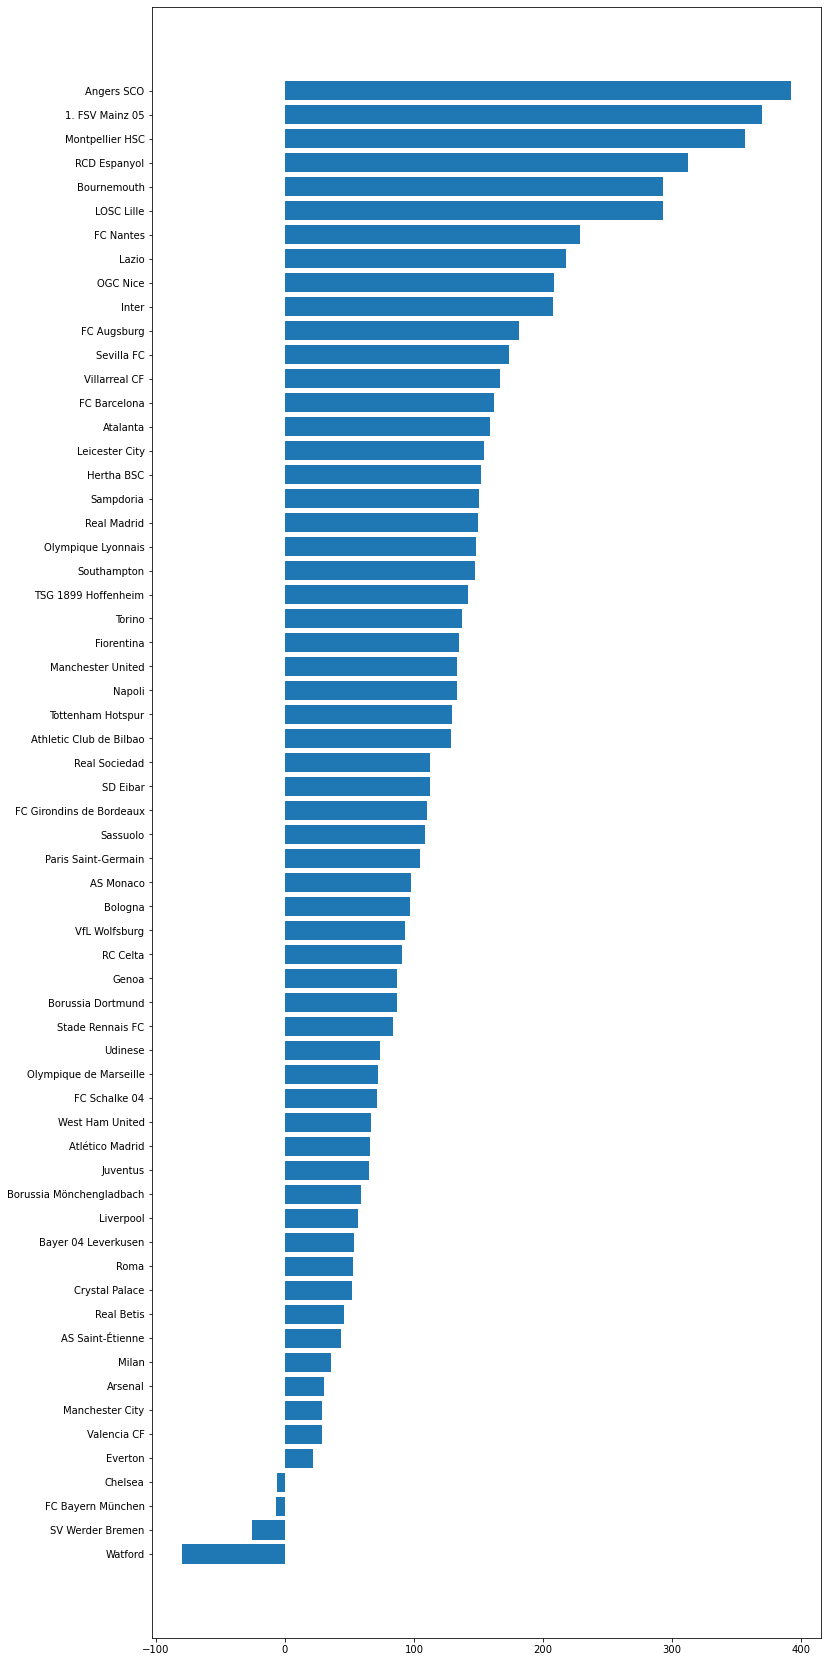

In [18]:
plt.figure(figsize=(12,30))
# sns.barplot(x = final_scores.keys(),y = final_scores.values())
plt.barh(final_scores_df['Teams'],final_scores_df['Scores'])

In [19]:
scaler = MinMaxScaler()
final_scores_df['Scores'] = scaler.fit_transform(final_scores_df['Scores'].values.reshape(-1,1))
final_scores_df['Scores'] = round(final_scores_df['Scores']*100,2)

**Plotting the data with Normalized scores**

<BarContainer object of 62 artists>

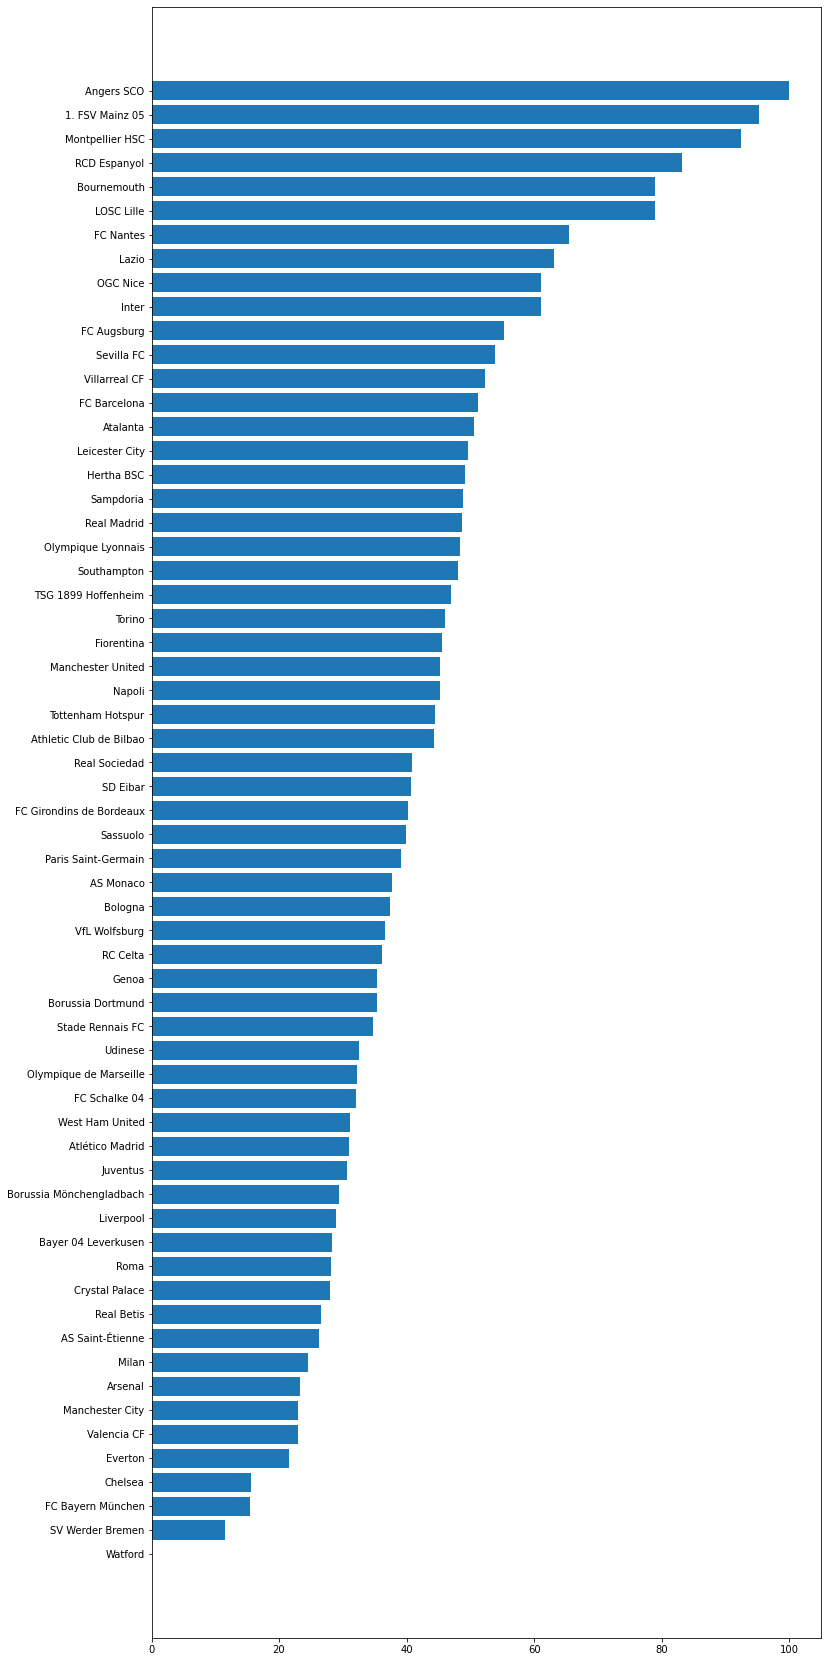

In [20]:
plt.figure(figsize=(12,30))
# sns.barplot(x = final_scores.keys(),y = final_scores.values())
plt.barh(final_scores_df['Teams'],final_scores_df['Scores'])

In [22]:
# final_scores_df.to_csv('Part C Scores.csv')

**Some Inferences**

    1. It looks like a lot of good teams are performing badly. For instance, Bayern Munich, Chelsea, Man City, Arsenal are all in the bottom 10.

1 thing we have noticed in the data is that there is an age penalty on performance. As age increases, performance either tapers or starts falling. Some of the good teams have a lot of older players who retired in the teams and players who already have high ratings (80+) beyond which increase is difficult because it takes exponentially higher performace for additional stats beyond a point. **Future work could include correcting for this age factor while calculating "Impact"**

    2. We have not included "value_eur" column, which gives the market value of a player in the calculation above.
    
We have done that below. Calculations are removed for the sake of brevity. We have not included the "value_eur" column as it is, but divided it by *100,000* so that the values don't skew the numbers too much.

And as we can see, even with that, all the rich clubs come out on top. FC Barcelona is the first by a huge margin, and almost all of this rides on the market value of **Lionel Messi**

In [23]:
alternate_final_scores_df = pd.read_csv(path + '/Part C Scores.csv')

<BarContainer object of 62 artists>

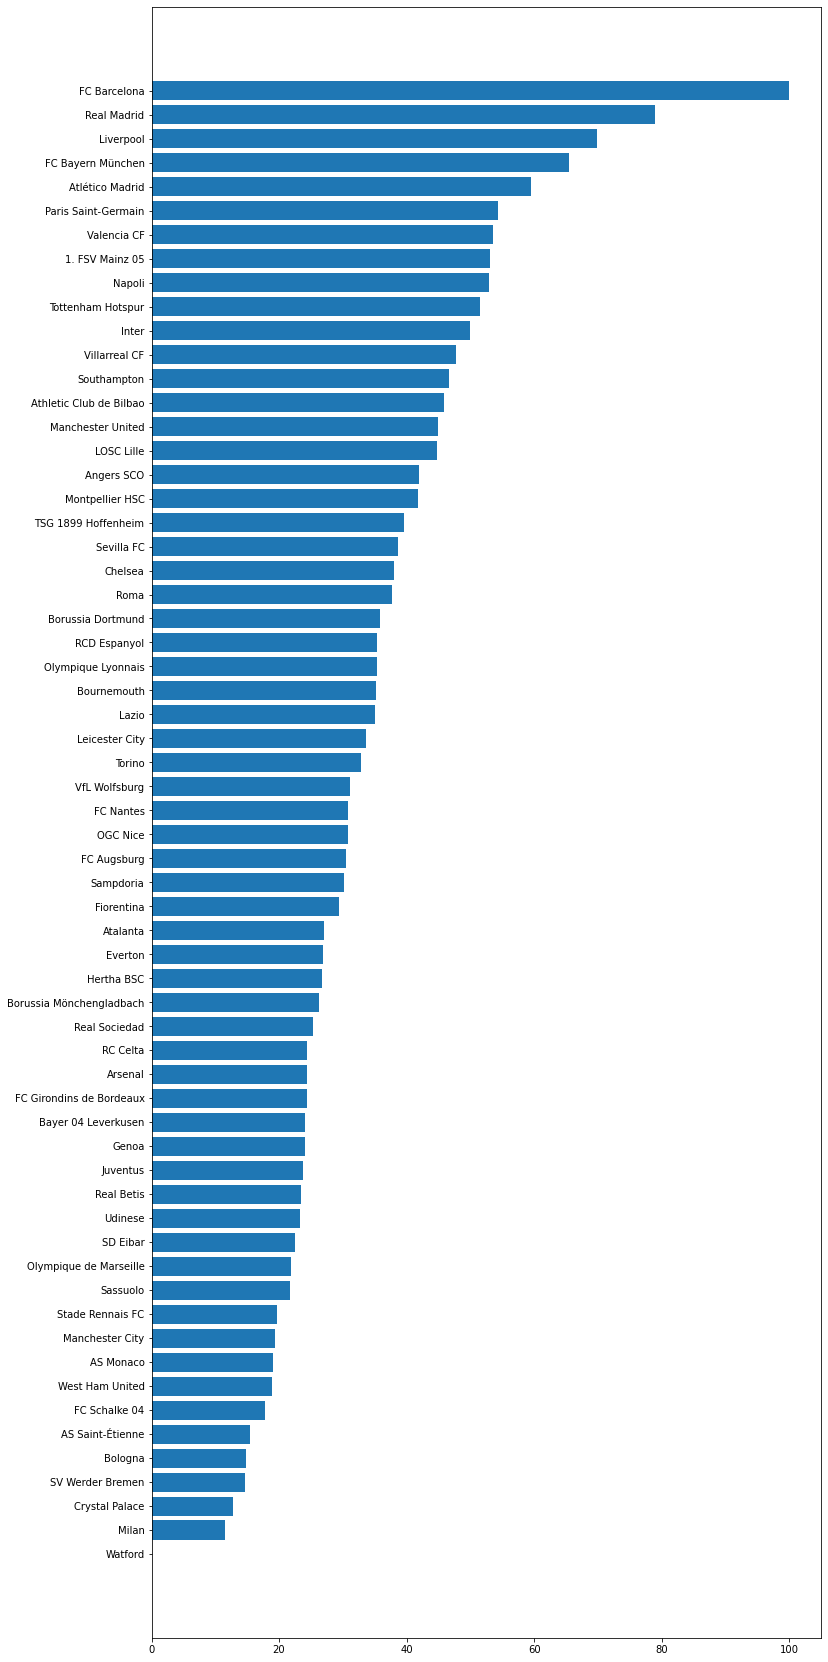

In [24]:
plt.figure(figsize=(12,30))
# sns.barplot(x = final_scores.keys(),y = final_scores.values())
plt.barh(alternate_final_scores_df['Teams'],alternate_final_scores_df['Scores'])